Index([0, 1, 2, 3, 4, 5, 6, 'label'], dtype='object')


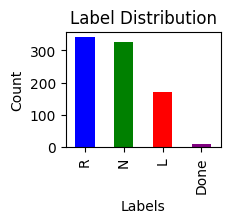

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load the data
df = pd.read_csv('labeled-data02.csv')

#remove outliers by setting an intuitive value 3
threshold = 3
df = df[df['F3'] <= threshold] 

threshold2 = -3
df = df[df['F3'] >= threshold2] 

# # Set a threshold for Z-scores to identify outliers
# threshold = 3 

# # Find the indices of outliers
# outlier_indices = (z_scores > threshold).any(axis=1)

# # Remove the rows containing outliers
# df_no_outliers = df[~outlier_indices]

# Only include features F3,F4,C3,Cz,C4,P3,P4
X = df.iloc[:, 2:9].values 
y = df['label'].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

df = pd.concat([pd.DataFrame(X),pd.Series(y, name='label')], axis=1)
# Count the occurrences of each label

label_counts = df['label'].value_counts()
print(df.columns)

# Plot a bar chart
plt.figure(figsize=(2, 1.5))
label_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

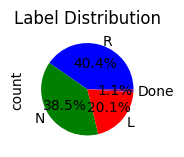

In [7]:
# Plot a pie chart
plt.figure(figsize=(2, 1.5))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
plt.title('Label Distribution')
plt.show()

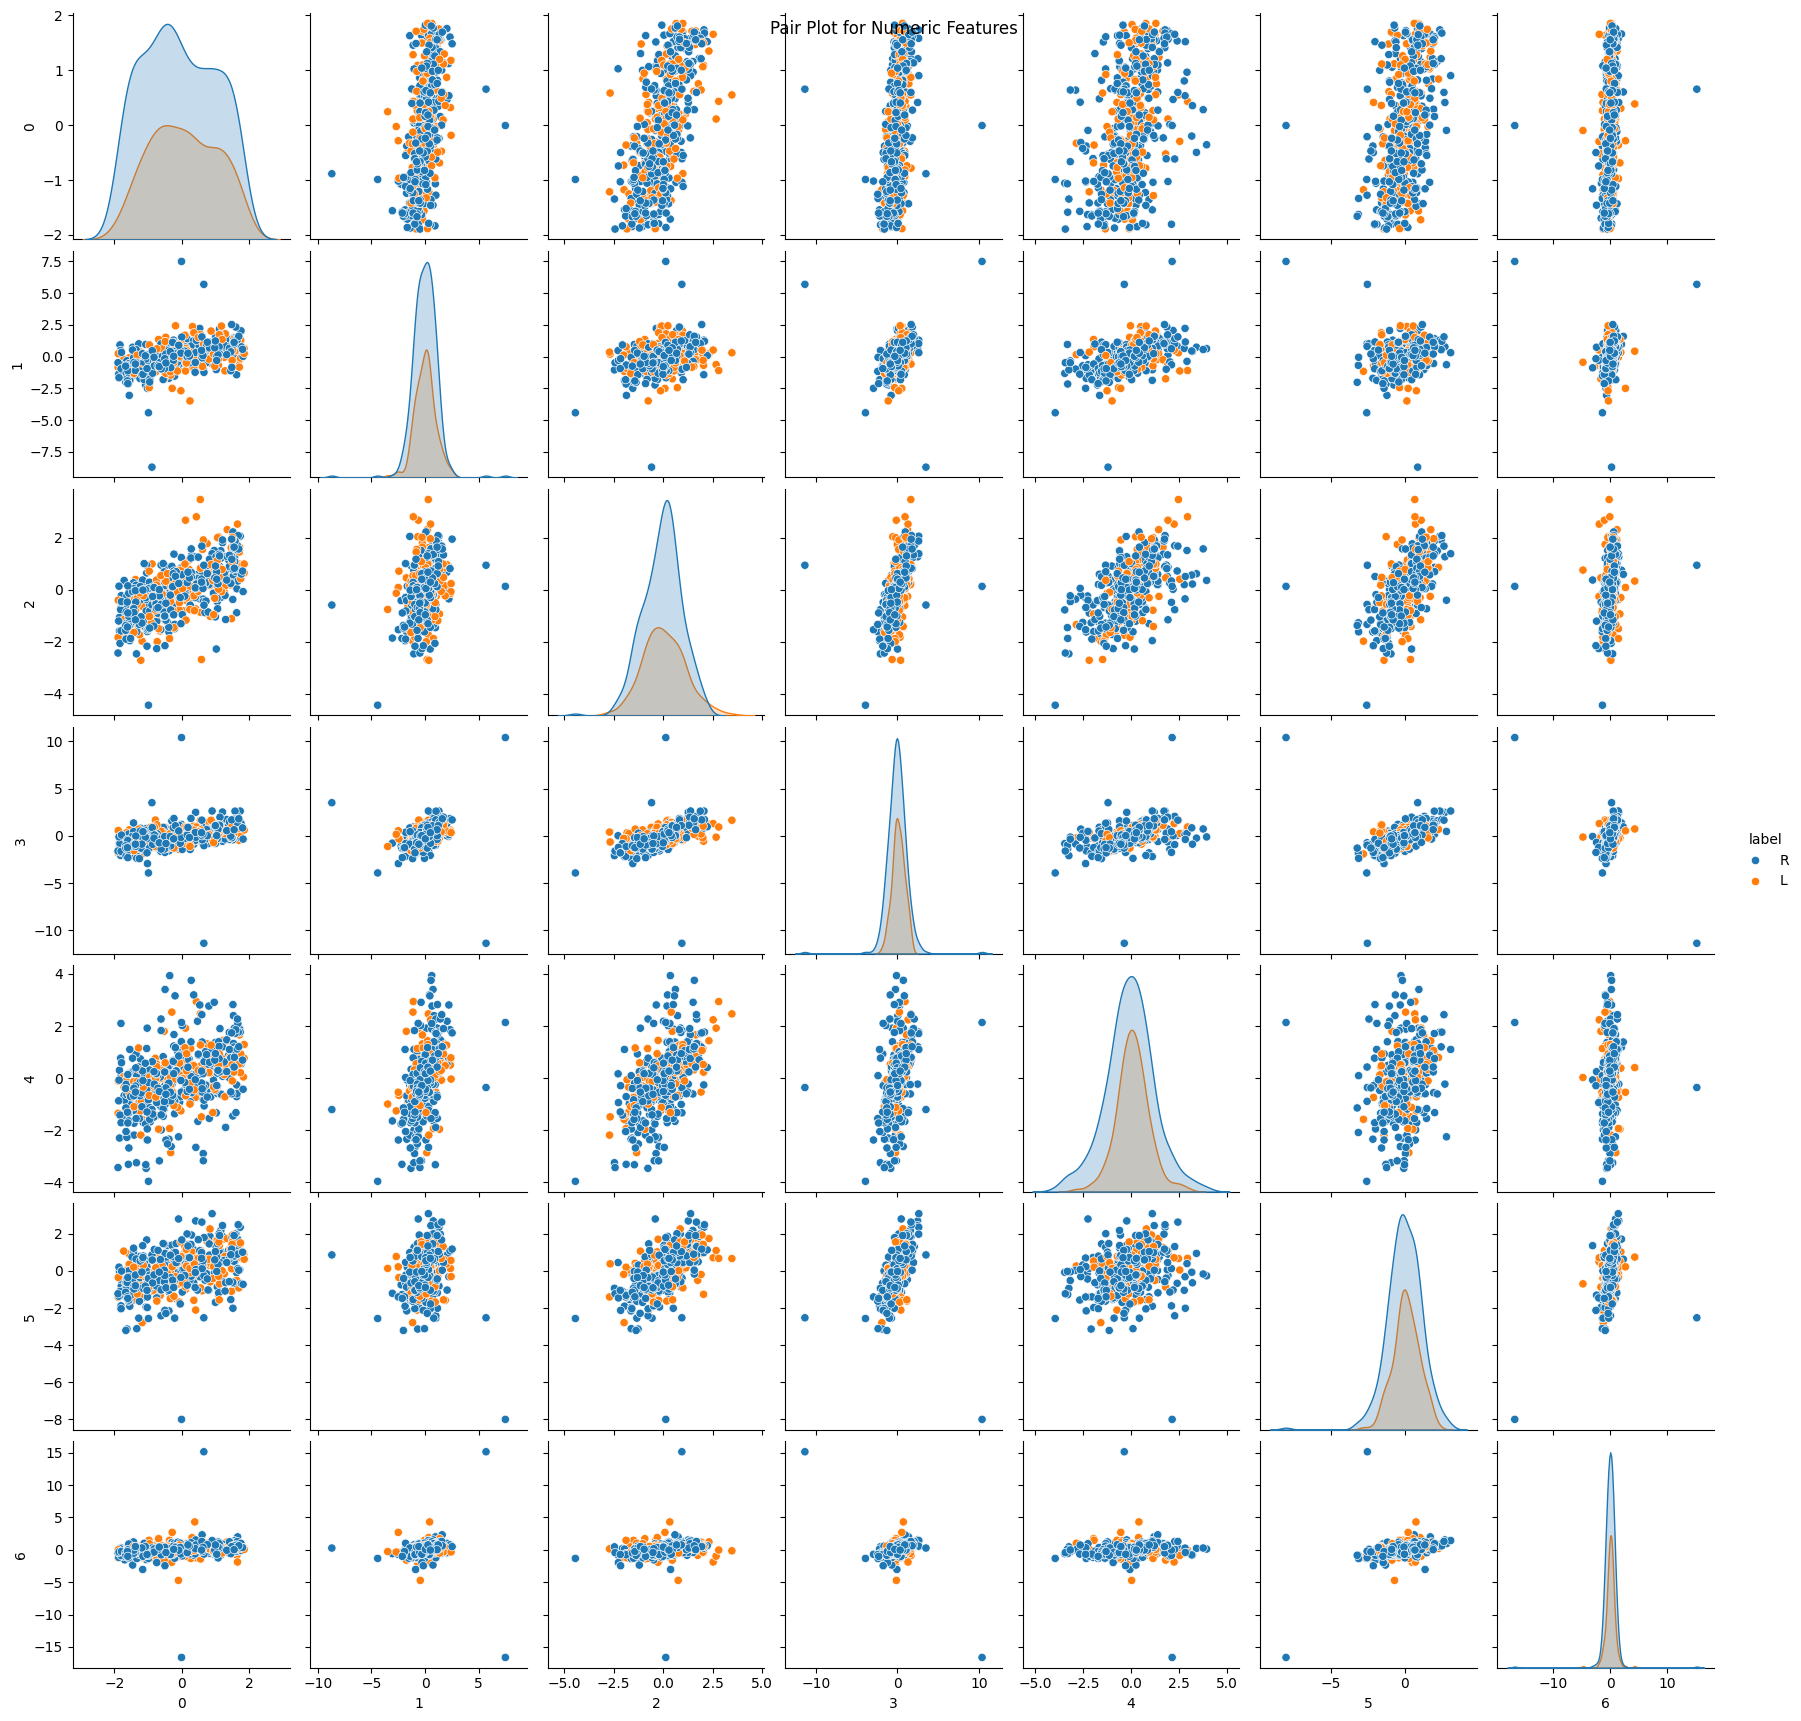

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove examples labeled 'N' or "Done"
df = df[df['label'] != 'N']
df = df[df['label'] != 'Done']
features = df.iloc[:, :]

# Filter numeric columns
numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns

# Combine numeric features with labels
df_combined = pd.concat([features[numeric_columns], df['label']], axis=1)

# Plot a pair plot
sns.pairplot(df_combined, hue='label', diag_kind='kde')
plt.suptitle('Pair Plot for Numeric Features')
plt.show()

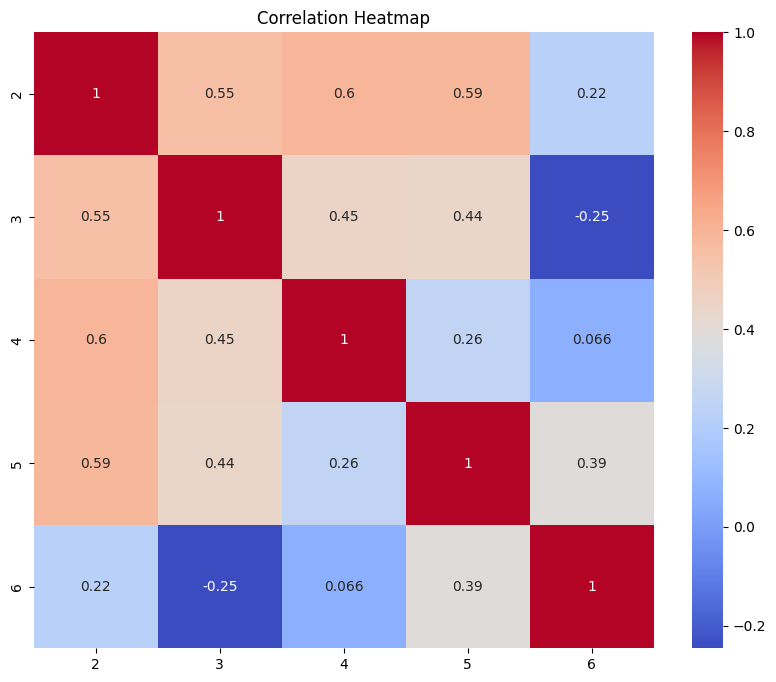

In [9]:
# Features 3 to 9(inclusive)
features = df.iloc[:, 2:9]

# Filter numeric columns
numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame with only numeric columns
numeric_features = features[numeric_columns]

# Plot a correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

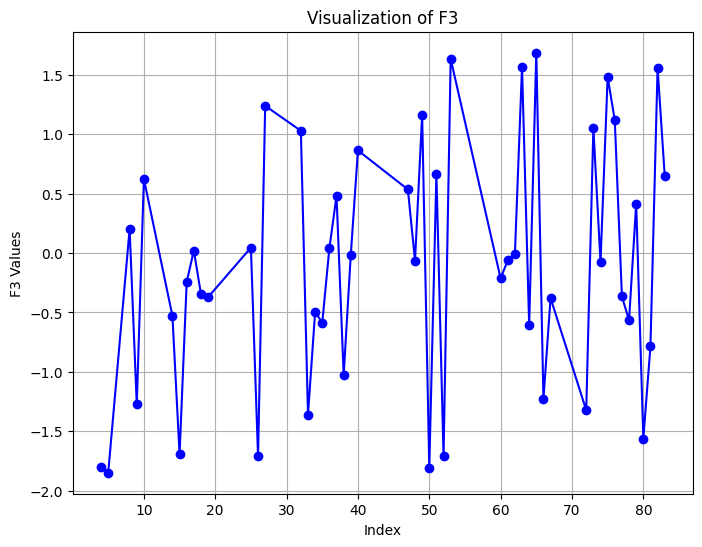

In [10]:
#plot F3 feature values per 1s timestamp
plt.figure(figsize=(8, 6))
plt.plot(df[0][:50], marker='o', linestyle='-', color='b')
plt.title('Visualization of F3')
plt.xlabel('Index')
plt.ylabel('F3 Values')
plt.grid(True)
plt.show()